# Density Field object
Density Field object is used to resample (Multi)LineString and (Multi)Polygon based on density values.

The density field is based on density points. Density points contain xy coordinates, density and growth values.
The density value indicates the required length for its xy location. 
The density increases in the field based on its density and growth values.

For example, here are two density points:\
P1=(x=0,y=0,density=1,growth=1.2)\
P2=(x=5,y=0,density=1,growth=1.05)

P1 is located x=0 and y=0 with a density value of 1.0 and growth of 1.2.\
P2 is located x=5 and y=0 with a density value of 1.0 and growth of 1.05.

The points generates the following density field:

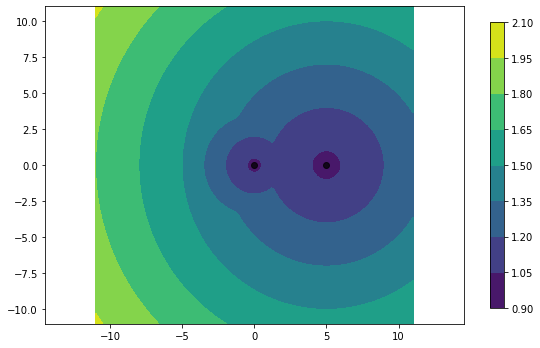

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mshapely import DF
density=np.array([[0,0,1,1.1],[2.5,0,10,1.2],[5,0,1,1.05]])
df=DF(density,minDensity=1,maxDensity=100,minGrowth=1.2)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
fig.tight_layout()  
df.plot(extent=[-10,-10,10,10],axe=axes,fig=fig,showDP=True)
pass

As shown in the image, the density grows from two density points. 
Notice that the growth is diffrent from the two points since they have two different growth values.

The density field automatically removes uninfluential points. For example, here are three density points:\
P1=(x=0,y=0,density=1,growth=1.2)\
P2=(x=5,y=0,density=1,growth=1.05)\
P3=(x=2.5,y=0,density=10,growth=1.05)

P3 will automatically be deleted since its has no inluence in the field.

## Theory
As mention, the density field is based on density points. 
Here is example of a density point(blue) and a density field location(red).\
[![diagram](img/diagram.png)](img/diagram.png)

*d*=density point value\
*g*=growth point value\
*n*=n factor\
*D*=field density\
*l*=length or distance from density point to desnity field location

The density grows using the following equation:\
\begin{equation*}
D=dg^{n}
\end{equation*}

If n is unknown and D is known:\
\begin{equation*}
n=\frac{ln(D/d)}{ln(g)}
\end{equation*}

To calculate the length or distance from density point to density field location, the sum needs to be calculated:\
\begin{equation*}
l=f(d,g,n)=\sum_{k=0}^{n}dg^k
\end{equation*}

To simplify, the sum can be converted to closed form:\
\begin{equation*}
\sum_{k=0}^{n}=ar^{k}\Rightarrow \frac{ar^{n+1}-a}{r-1}
\end{equation*}
\begin{equation*}
l=\frac{dg^{n+1}-d}{g-1}
\end{equation*}

If n is unknown and l is known:\
\begin{equation*}
n=\frac{ln(l(g-1)/d+1)}{ln(g)}-1
\end{equation*}

Each density point creates it own density field and only the minimum value is kept.


### mshapely.DF(array[,minDensity=None,maxDensity=None,minGrowth=None])

In [2]:
from mshapely import DF
print(DF.__doc__)


  Density Field Object.
  
  This object is used to resample (Multi)LineString and (Multi)Polygon based on a density field.
  
  Parameters
  ----------
  array: 2D ndarray
    shape: (npoint,4) : [[x,y,density,growth]] 
      x:x-coordinate
      y:y-coordinate
      density:density value
      growth:growth value
  minDensity: float,
    Default minDensity of the field. If None, it takes minimum value of array-density
  maxDensity: float,
    Default maxDensity of the field. If None, it takes maximum value of array-density
  minGrowth:float,
    Default growth of the field. If None,it will take minimum value of array-growth
  balanced_tree:bool
    balanced_tree is a kdtree parameter
  nvalue:int
    Number of points search in the kdtree. Higher memory is required for higher point number. 
  Attributes
  ----------
  dp: ndarray,
    shape:(npoints,6),[[x,y,density,growth,groupId,pointId]]
  


### mshapely.add(array)

In [3]:
from mshapely import DF
print(DF.add.__doc__)


    Add points to the density field
    
    Parameters
    ----------
    array: 2D ndarray : [[x,y,density,growth]]
    
    Note
    ----------
    It creates groupId and pointId automatically
    The field parameter minDensity,maxDensity and minGrowth are only defined when DF is created.
    This will not change minDensity, maxDensity and minGrowth.
    


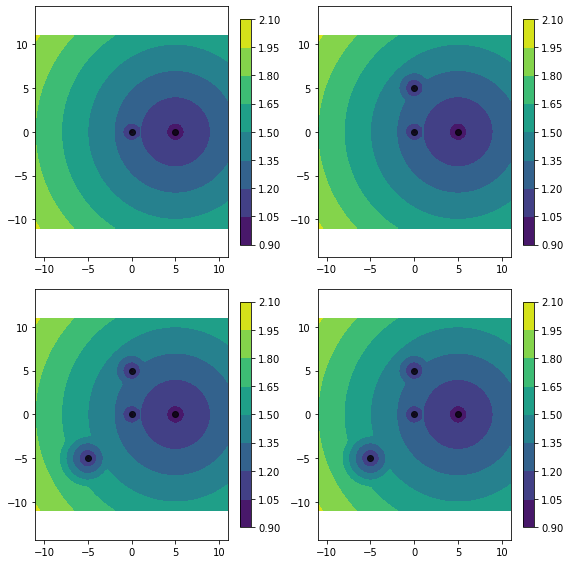

In [4]:
density=np.array([[0,0,1,1.2],[2.5,0,10,1.2],[5,0,1,1.05]])
df=DF(density,minDensity=1,maxDensity=100,minGrowth=1.2)
  
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.tight_layout()
  
df.plot(extent=[-10,-10,10,10],axe=axes[0][0],fig=fig,showDP=True)
df.add([[0,5,1,1.2]])\
 .plot(extent=[-10,-10,10,10],axe=axes[0][1],fig=fig,showDP=True)
df.add([[-5,-5,1,1.2]])\
 .plot(extent=[-10,-10,10,10],axe=axes[1][0],fig=fig,showDP=True)
df.add([[-5,5,5,1.2]])\
 .plot(extent=[-10,-10,10,10],axe=axes[1][1],fig=fig,showDP=True)
pass
